# Machine Learning for Time Series Data in Python

## Chapter 2: Time Series as Inputs to a Model

In [54]:
import os
from glob import glob
import datetime
import itertools
import librosa as lr
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC
from sklearn import linear_model
from sklearn.model_selection import cross_val_score

In [55]:
normal = pd.read_csv("normal_sound.csv", index_col=0)
abnormal = pd.read_csv("abnormal_sound.csv", index_col=0)
sfreq = 2205

In [56]:
normal

,3,4,6
time,,,
0.000000,-0.000995,0.000281,0.002953
0.000454,-0.003381,0.000381,0.003034
0.000907,-0.000948,0.000063,0.000292
0.001361,-0.000766,0.000026,-0.005916
0.001814,0.000469,-0.000432,-0.005307
...,...,...,...
3.997732,-0.000089,-0.005931,0.002474
3.998186,-0.000112,-0.004839,0.004467
3.998639,-0.000233,-0.000591,0.016809


In [57]:
abnormal

,0,1,2
time,,,
0.000000,-0.024684,-0.024507,0.008254
0.000454,-0.060429,-0.047736,0.014809
0.000907,-0.070080,-0.039938,0.010475
0.001361,-0.084212,-0.041199,0.010272
0.001814,-0.085111,-0.036050,0.008580
...,...,...,...
3.997732,0.010513,-0.401539,0.138510
3.998186,0.009675,-0.360107,0.134382
3.998639,0.007957,-0.317170,0.124178


In [58]:
def show_plot_and_make_titles():
    axs[0, 0].set(title="Normal Heartbeats")
    axs[0, 1].set(title="Abnormal Heartbeats")
    plt.tight_layout()

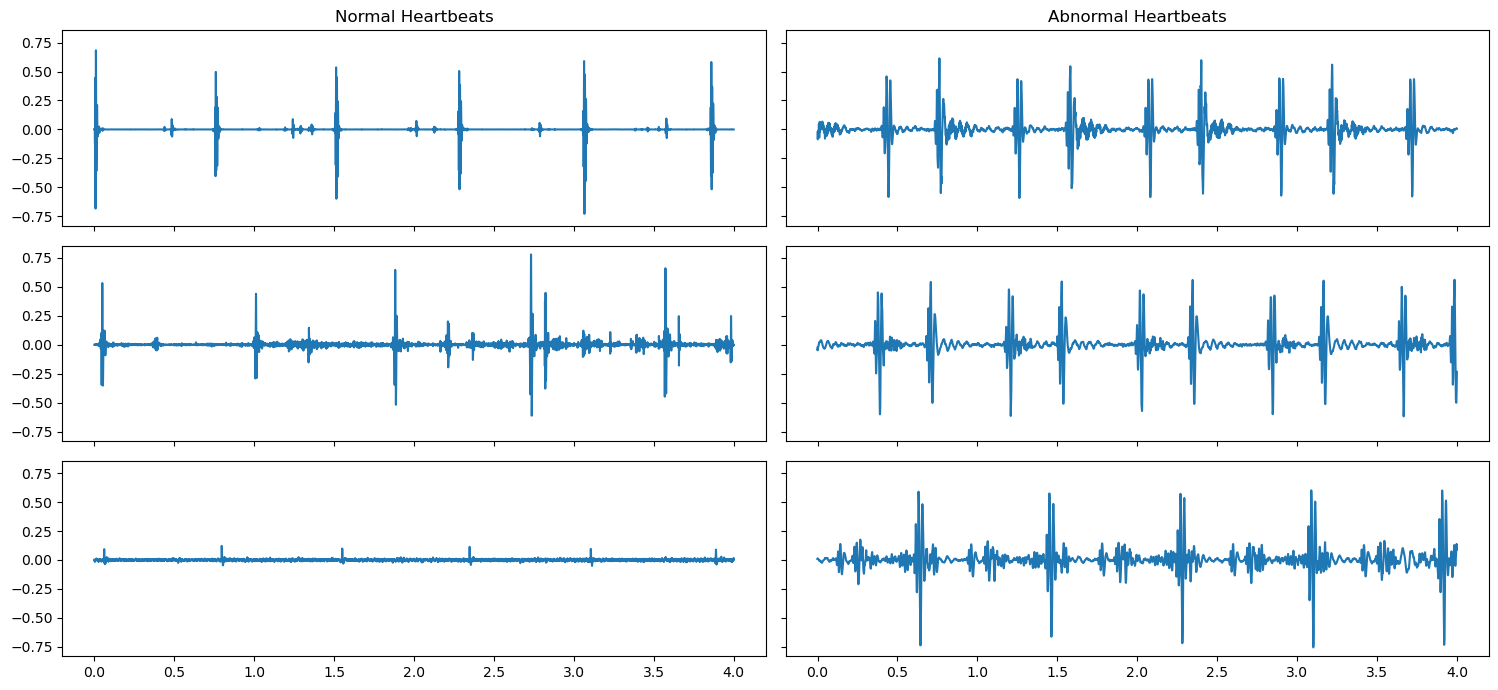

In [59]:
fig, axs = plt.subplots(3, 2, figsize=(15, 7), sharex=True, sharey=True)

# Calculate the time array
time = np.arange(normal.shape[0]) / sfreq

# Stack the normal/abnormal audio so you can loop and plot
stacked_audio = np.hstack([normal, abnormal]).T

# Loop through each audio file / ax object and plot
# .T.ravel() transposes the array, then unravels it into a 1-D vector for looping
for iaudio, ax in zip(stacked_audio, axs.T.ravel()):
    ax.plot(time, iaudio)
show_plot_and_make_titles()

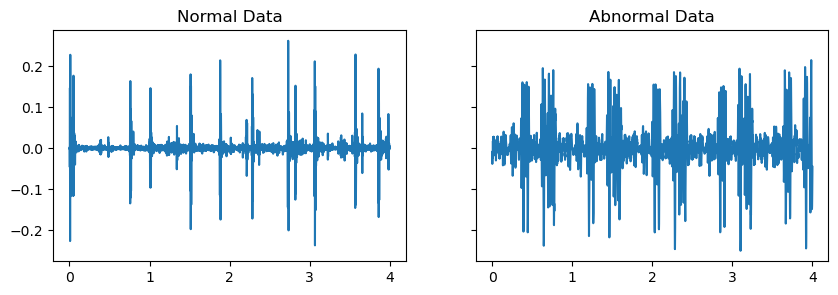

In [60]:
# Average across the audio files of each DataFrame
mean_normal = np.mean(normal, axis=1)
mean_abnormal = np.mean(abnormal, axis=1)

# Plot each average over time
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 3), sharey=True)
ax1.plot(time, mean_normal)
ax1.set(title="Normal Data")
ax2.plot(time, mean_abnormal)
ax2.set(title="Abnormal Data")
plt.show()

In [61]:
normal = pd.read_csv("heart_normal.csv", index_col=0)
abnormal = pd.read_csv("heart_abnormal.csv", index_col=0)

In [62]:
normal_train_idx = np.random.choice(normal.shape[1], size=22, replace=False).tolist()
normal_test_idx = list(set(np.arange(normal.shape[1]).tolist()) - set(normal_train_idx))

abnormal_train_idx = np.random.choice(abnormal.shape[1], size=20, replace=False).tolist()
abnormal_test_idx = list(set(np.arange(abnormal.shape[1]).tolist()) - set(abnormal_train_idx))

X_train = pd.concat([normal.iloc[:, normal_train_idx], 
                     abnormal.iloc[:, abnormal_train_idx]], axis=1).to_numpy().T
X_test = pd.concat([normal.iloc[:, normal_test_idx], 
                    abnormal.iloc[:, abnormal_test_idx]], axis=1).to_numpy().T

y_train = np.array(['normal'] * len(normal_train_idx) + ['abnormal'] * len(abnormal_train_idx))
y_test = np.array(['normal'] * len(normal_test_idx) + ['abnormal'] * len(abnormal_test_idx))

In [63]:
# Initialize and fit the model
model = LinearSVC(dual="auto")
model.fit(X_train, y_train)

# Generate predictions and score them manually
predictions = model.predict(X_test)
print(sum(predictions == y_test.squeeze()) / len(y_test))

0.5


In [64]:
normal = pd.read_csv("normal_sound.csv", index_col=0)
abnormal = pd.read_csv("abnormal_sound.csv", index_col=0)
sfreq = 2205
time = np.arange(normal.shape[0]) / sfreq
print(normal.shape, normal.columns)
print(abnormal.shape, abnormal.columns)

(8820, 3) Index(['3', '4', '6'], dtype='object')
(8820, 3) Index(['0', '1', '2'], dtype='object')


In [65]:
audio = abnormal["0"].iloc[0: sfreq]

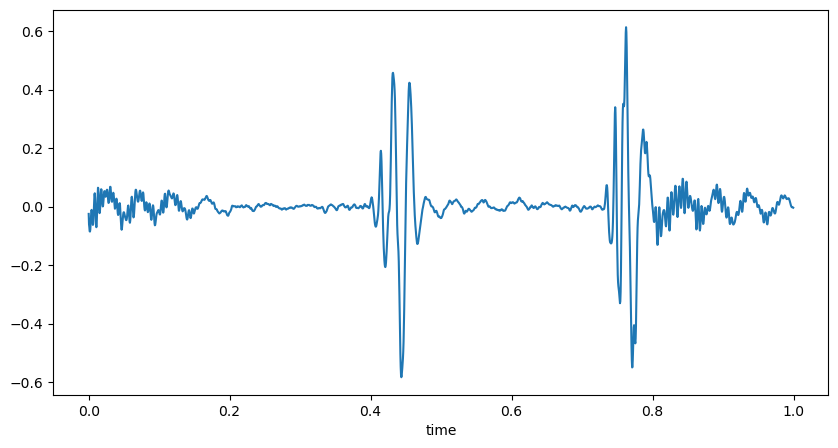

In [66]:
# Plot the raw data first
audio.plot(figsize=(10, 5))
plt.show()

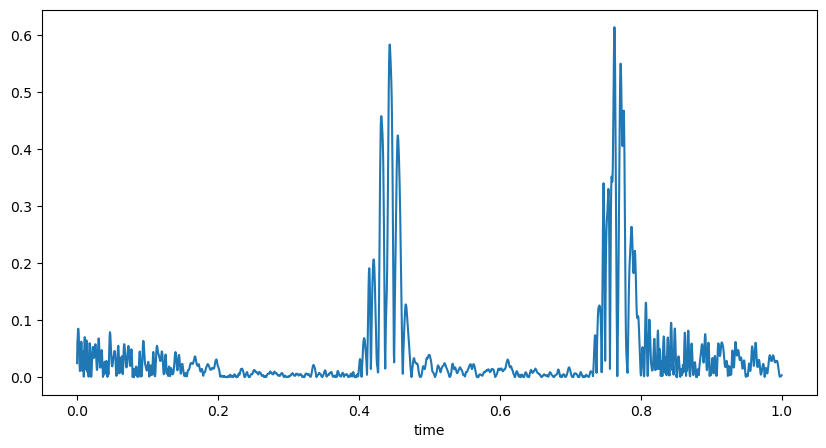

In [67]:
# Rectify the audio signal
audio_rectified = audio.apply(abs)

# Plot the result
audio_rectified.plot(figsize=(10, 5))
plt.show()

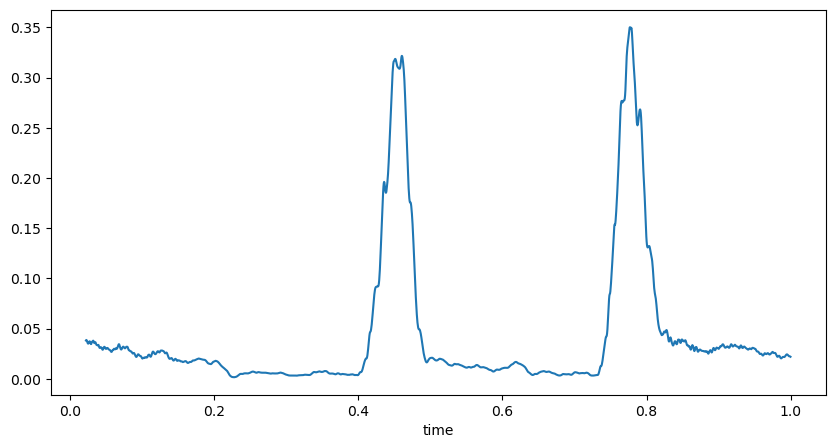

In [68]:
# Smooth by applying a rolling mean
audio_rectified_smooth = audio_rectified.rolling(50).mean()

# Plot the result
audio_rectified_smooth.plot(figsize=(10, 5))
plt.show()

In [73]:
# List all the wav files in the folder
data_dir = r"D:/GitHub/data-sets/datacamp/kaggle-heartbeat-sounds/set_a"
all_audio_files = glob(data_dir + r"/*.wav")

df_audio_files = pd.DataFrame(all_audio_files, columns=["full_path"])

df_audio_files["file_name"] = df_audio_files["full_path"].apply(os.path.basename)
df_audio_files["prefix"] = df_audio_files["file_name"].str.extract(r"^(.*)__.*.wav")
df_audio_files["date_time_string"] = df_audio_files["file_name"].str.extract(r".*__(\d*).wav")
df_audio_files["date_time"] = pd.to_datetime(df_audio_files["date_time_string"], format="%Y%m%d%H%M")

df_normal_murmur = df_audio_files[df_audio_files["prefix"].str.contains("normal|murmur")].copy()
df_normal_murmur

,full_path,file_name,prefix,date_time_string,date_time
111,D:/GitHub/data-sets/datacamp/kaggle-heartbeat-...,murmur__201101051104.wav,murmur,201101051104,2011-01-05 11:04:00
112,D:/GitHub/data-sets/datacamp/kaggle-heartbeat-...,murmur__201101051108.wav,murmur,201101051108,2011-01-05 11:08:00
113,D:/GitHub/data-sets/datacamp/kaggle-heartbeat-...,murmur__201101051114.wav,murmur,201101051114,2011-01-05 11:14:00
114,D:/GitHub/data-sets/datacamp/kaggle-heartbeat-...,murmur__201101180902.wav,murmur,201101180902,2011-01-18 09:02:00
115,D:/GitHub/data-sets/datacamp/kaggle-heartbeat-...,murmur__201102051443.wav,murmur,201102051443,2011-02-05 14:43:00
...,...,...,...,...,...
171,D:/GitHub/data-sets/datacamp/kaggle-heartbeat-...,normal__201106221450.wav,normal,201106221450,2011-06-22 14:50:00
172,D:/GitHub/data-sets/datacamp/kaggle-heartbeat-...,normal__201108011112.wav,normal,201108011112,2011-08-01 11:12:00
173,D:/GitHub/data-sets/datacamp/kaggle-heartbeat-...,normal__201108011114.wav,normal,201108011114,2011-08-01 11:14:00
174,D:/GitHub/data-sets/datacamp/kaggle-heartbeat-...,normal__201108011115.wav,normal,201108011115,2011-08-01 11:15:00


In [69]:
# Calculate stats
means = np.mean(audio_rectified_smooth, axis=0)
stds = np.std(audio_rectified_smooth, axis=0)
maxs = np.max(audio_rectified_smooth, axis=0)

# Create the X and y arrays
X = np.column_stack([means, stds, maxs])
y = labels.reshape(-1, 1)

# Fit the model and score on testing data
percent_score = cross_val_score(model, X, y, cv=5)
print(np.mean(percent_score))

NameError: name 'labels' is not defined

In [71]:
X

array([[0.04277756, 0.07247505, 0.35010321]])